In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv('Sales_data\Sales_Data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\PARTHO\AppData\Local\Temp\ipykernel_9076\1990225721.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('Sales_data\Sales_Data.csv')


In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Overview

In [21]:
# How many unique products are there in the dataset?
unique_products = df['Product'].nunique()
print(f"Unique products: {unique_products}")



Unique products: 20


In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with NaT in 'OrderDate' due to invalid data
df.dropna(subset=['Order Date'], inplace=True)

C:\Users\PARTHO\AppData\Local\Temp\ipykernel_9076\711322073.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [23]:
# What is the range of order dates in the dataset?
order_dates = df['Order Date'].min(), df['Order Date'].max()
print(order_dates)


(Timestamp('2019-01-01 03:07:00'), Timestamp('2020-01-01 05:13:00'))


In [24]:
# Are there any missing or null values? If yes, how will you handle them?
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")
df.dropna(inplace=True)  # Drop rows with missing values



Missing values:
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [25]:
# Are there any duplicate rows in the dataset? If yes, should they be removed?
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")
df.drop_duplicates(inplace=True)  # Remove duplicate rows

Duplicate rows: 264


### 2. Basic Statistics

In [27]:
# Ensure 'QuantityOrdered' is numeric, coercing errors to NaN
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

# Drop rows with NaN in 'QuantityOrdered' due to invalid data
df.dropna(subset=['Quantity Ordered'], inplace=True)


In [28]:
# What is the average quantity ordered for each product?
average_quantity = df.groupby('Product')['Quantity Ordered'].mean()
print(f"Average quantity ordered for each product:\n{average_quantity}")

Average quantity ordered for each product:
Product
20in Monitor                  1.006833
27in 4K Gaming Monitor        1.002249
27in FHD Monitor              1.005735
34in Ultrawide Monitor        1.002915
AA Batteries (4-pack)         1.343273
AAA Batteries (4-pack)        1.503299
Apple Airpods Headphones      1.007214
Bose SoundSport Headphones    1.009926
Flatscreen TV                 1.003963
Google Phone                  1.001268
LG Dryer                      1.000000
LG Washing Machine            1.000000
Lightning Charging Cable      1.072143
Macbook Pro Laptop            1.000847
ThinkPad Laptop               1.000485
USB-C Charging Cable          1.094789
Vareebadd Phone               1.001453
Wired Headphones              1.088864
iPhone                        1.001023
Name: Quantity Ordered, dtype: float64


In [32]:
# Convert 'Order Date' to datetime, coercing errors to NaT (Not a Time)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with NaT in 'Order Date' due to invalid data
df.dropna(subset=['Order Date'], inplace=True)

# Ensure 'Quantity Ordered' is numeric, coercing errors to NaN
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

# Ensure 'Price Each' is numeric, coercing errors to NaN
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

# Drop rows with NaN in 'Quantity Ordered' or 'Price Each' due to invalid data
df.dropna(subset=['Quantity Ordered', 'Price Each'], inplace=True)

# Calculate the total revenue generated from all sales
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

# Ensure 'Revenue' is numeric
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

In [33]:
# Calculate the total revenue generated from all sales
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']
total_revenue = df['Revenue'].sum()
print(f"Total revenue: {total_revenue}")

Total revenue: 34465537.94


In [34]:
# What is the minimum, maximum, and average price of the products sold?
min_price = df['Price Each'].min()
max_price = df['Price Each'].max()
avg_price = df['Price Each'].mean()
print(f"Min price: {min_price}, Max price: {max_price}, Average price: {avg_price}")


Min price: 2.99, Max price: 1700.0, Average price: 184.51925546352444


### 3. Data Cleaning

In [35]:

# Extract useful information from Order Date, such as month, day, and hour.
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Hour'] = df['Order Date'].dt.hour

In [36]:
# Split Purchase Address into components like city, state, and ZIP code for analysis.
df[['City', 'State', 'ZIP Code']] = df['Purchase Address'].str.extract(r'([^,]+),\s*([^,]+)\s*(\d{5})')


# Sales Performance Analysis

In [37]:

# 4. Best Month for Sales
# Identify the month with the highest sales revenue.
monthly_sales = df.groupby('Month')['Revenue'].sum()
best_month = monthly_sales.idxmax()
print(f"Best month for sales: {best_month}")

Best month for sales: 12


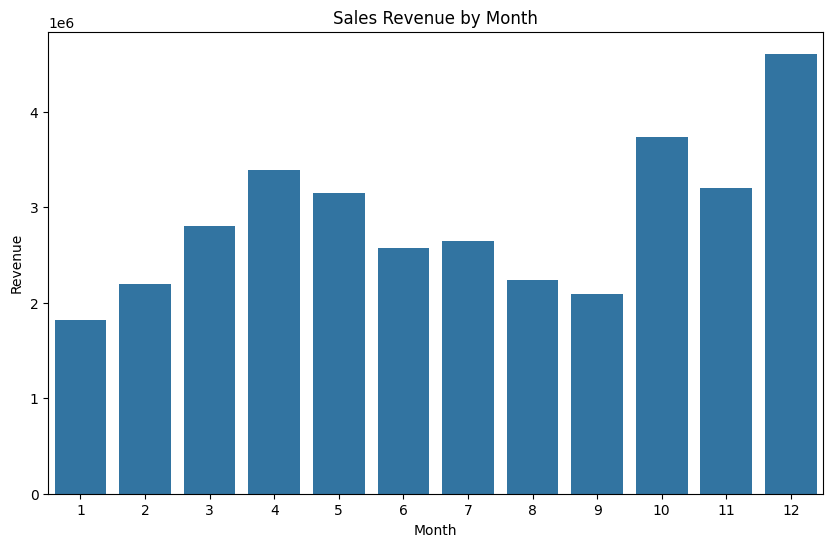

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Sales Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

# 5. Best Time for Display Advertisement

In [39]:

# Analyze the hours with the highest number of orders.
hourly_orders = df.groupby('Hour')['Quantity Ordered'].count()
best_hour = hourly_orders.idxmax()
print(f"Best hour for display advertisement: {best_hour}")

Best hour for display advertisement: 19


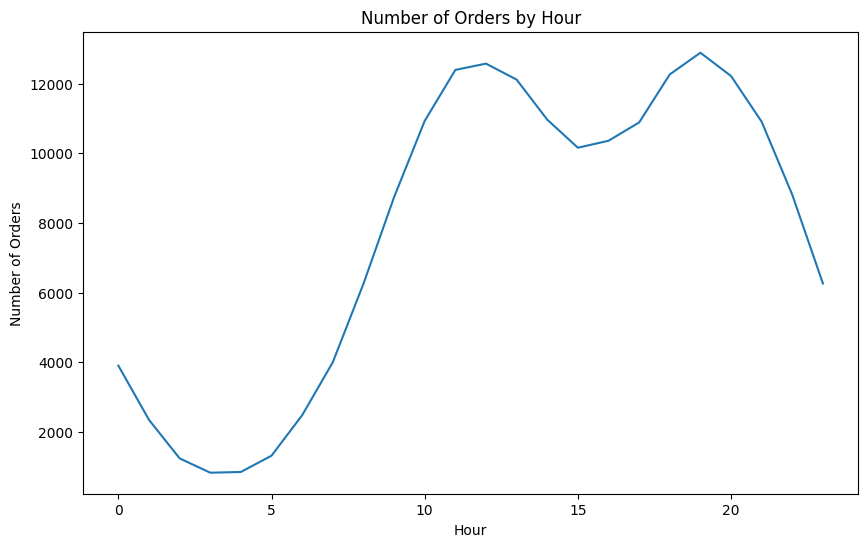

In [40]:
# Suggest the best time to display advertisements to maximize sales.
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values)
plt.title('Number of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

# 6. Most Product-Selling City

In [41]:

# Which city has the highest sales revenue?
city_sales = df.groupby('City')['Revenue'].sum()
best_city = city_sales.idxmax()
print(f"City with highest sales revenue: {best_city}")


City with highest sales revenue:  San Francisco


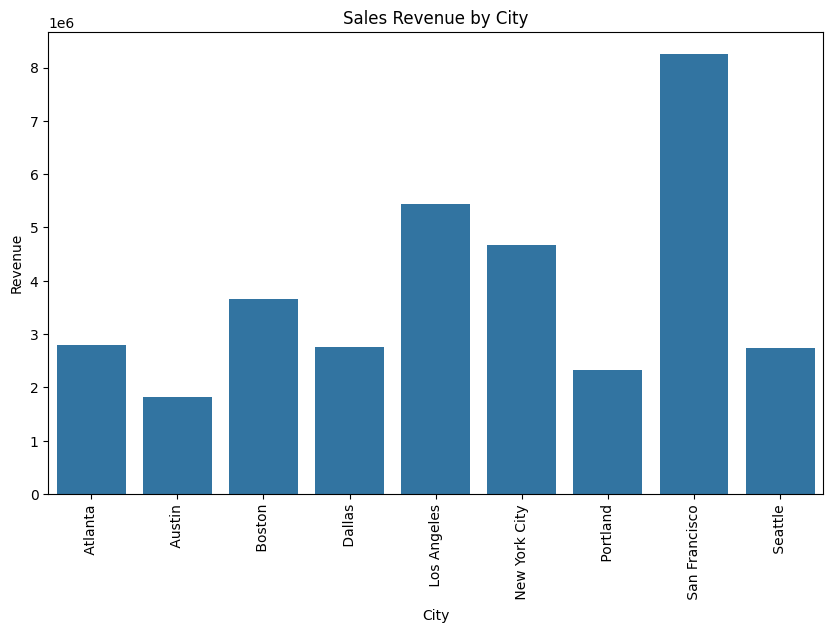

In [42]:
# Visualize city-wise sales using a bar plot or map-based visualization.
plt.figure(figsize=(10, 6))
sns.barplot(x=city_sales.index, y=city_sales.values)
plt.title('Sales Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

# Product-Specific Analysis

## 7. Most Sold Products

In [46]:

# # Identify the top 5 most sold products by quantity.
# top_products = df.groupby('Product')['Quantity Ordered'].sum().nlargest(5)
# print(f"Top 5 most sold products:\n{top_products}")

top_products = df.groupby('Product')['Quantity Ordered'].sum().nlargest(5)
print(f"Top 5 most sold products:\n{top_products}")

Top 5 most sold products:
Product
AAA Batteries (4-pack)      30986
AA Batteries (4-pack)       27615
USB-C Charging Cable        23931
Lightning Charging Cable    23169
Wired Headphones            20524
Name: Quantity Ordered, dtype: int64


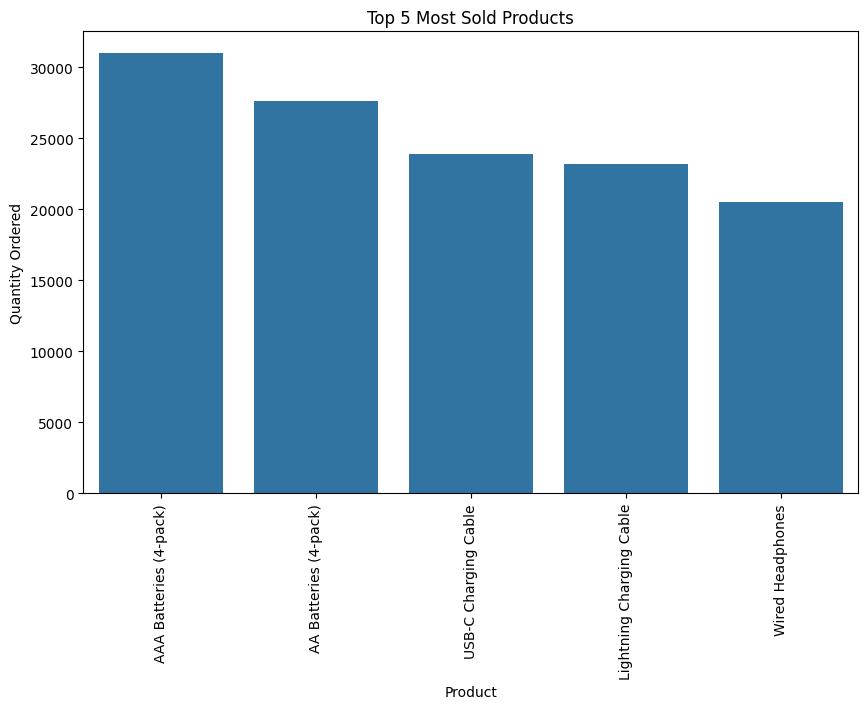

In [47]:
# Visualize the top 5 products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 5 Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

In [48]:
# What could be the possible reasons for these products’ popularity?
print("Possible reasons for the popularity of these products could be their price, seasonality, or bundling with other popular products.")

Possible reasons for the popularity of these products could be their price, seasonality, or bundling with other popular products.


# 8. Products Most Often Sold Together

In [49]:

# Find product pairs that are frequently sold together in the same order.
from itertools import combinations
from collections import Counter

In [50]:
# Create a dataframe with Order ID and Product
order_product_df = df[['Order ID', 'Product']].drop_duplicates()


In [51]:
# Group by Order ID and create a list of products for each order
order_product_list = order_product_df.groupby('Order ID')['Product'].apply(list)

In [52]:
# Count the frequency of each product pair
pair_count = Counter()
for products in order_product_list:
    pairs = combinations(products, 2)
    pair_count.update(pairs)

In [54]:
# Find the most common product pairs
most_common_pairs = pair_count.most_common(5)
print(f"Most common product pairs:\n{most_common_pairs}")

Most common product pairs:
[(('iPhone', 'Lightning Charging Cable'), 1002), (('Google Phone', 'USB-C Charging Cable'), 985), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 413), (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]


In [55]:
# Suggest potential bundling strategies based on the insights.
print("Based on the common product pairs, potential bundling strategies can be suggested to increase sales.")


Based on the common product pairs, potential bundling strategies can be suggested to increase sales.


# 9. Price vs. Quantity Relationship

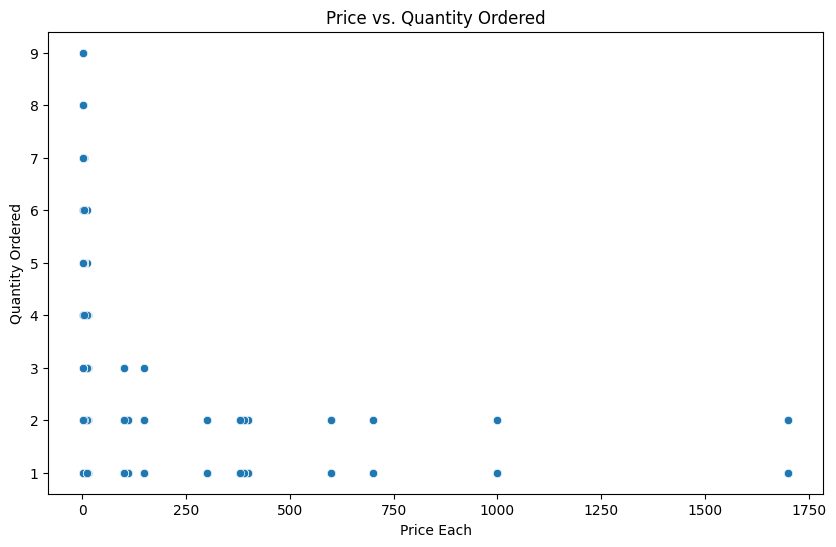

In [56]:

# Analyze the relationship between product price and quantity ordered.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=df)
plt.title('Price vs. Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.show()

In [57]:
# Are lower-priced items sold in higher quantities?
correlation = df['Price Each'].corr(df['Quantity Ordered'])
print(f"Correlation between price and quantity ordered: {correlation}")
if correlation < 0:
    print("Lower-priced items are sold in higher quantities.")

Correlation between price and quantity ordered: -0.14842155126900627
Lower-priced items are sold in higher quantities.


# Customer Insights


# 10. Most Active Customers

In [58]:
# Identify customers (based on Purchase Address) who have made the highest number of purchases or generated the highest revenue.
customer_purchases = df.groupby('Purchase Address')['Order ID'].count()
top_customers_purchases = customer_purchases.nlargest(5)
print(f"Top 5 customers by number of purchases:\n{top_customers_purchases}")


Top 5 customers by number of purchases:
Purchase Address
193 Forest St, San Francisco, CA 94016    9
223 Elm St, Los Angeles, CA 90001         8
279 Sunset St, San Francisco, CA 94016    8
176 North St, San Francisco, CA 94016     7
284 Walnut St, San Francisco, CA 94016    7
Name: Order ID, dtype: int64


In [59]:
customer_revenue = df.groupby('Purchase Address')['Revenue'].sum()
top_customers_revenue = customer_revenue.nlargest(5)
print(f"Top 5 customers by revenue:\n{top_customers_revenue}")

Top 5 customers by revenue:
Purchase Address
668 Park St, San Francisco, CA 94016        4379.99
391 1st St, Seattle, WA 98101               4100.00
795 1st St, Atlanta, GA 30301               4100.00
731 11th St, New York City, NY 10001        3919.88
208 Chestnut St, San Francisco, CA 94016    3789.99
Name: Revenue, dtype: float64


In [60]:
# What percentage of revenue do the top 10% of customers contribute?
top_10_percent_customers = customer_revenue.nlargest(int(len(customer_revenue) * 0.1))
percentage_revenue = (top_10_percent_customers.sum() / customer_revenue.sum()) * 100
print(f"Percentage of revenue contributed by top 10% customers: {percentage_revenue:.2f}%")


Percentage of revenue contributed by top 10% customers: 49.95%


# 11. City-Wise Product Preferences

In [61]:
# Which products are most popular in different cities?
city_product_sales = df.groupby(['City', 'Product'])['Quantity Ordered'].sum().reset_index()
most_popular_products = city_product_sales.loc[city_product_sales.groupby('City')['Quantity Ordered'].idxmax()]
print(f"Most popular products in different cities:\n{most_popular_products}")

Most popular products in different cities:
               City                 Product  Quantity Ordered
5           Atlanta  AAA Batteries (4-pack)              2358
24           Austin  AAA Batteries (4-pack)              1668
43           Boston  AAA Batteries (4-pack)              3458
62           Dallas  AAA Batteries (4-pack)              2500
81      Los Angeles  AAA Batteries (4-pack)              4958
100   New York City  AAA Batteries (4-pack)              4119
119        Portland  AAA Batteries (4-pack)              2078
138   San Francisco  AAA Batteries (4-pack)              7404
157         Seattle  AAA Batteries (4-pack)              2443


In [62]:
# Are there city-specific trends that might indicate localized preferences?
print("City-specific trends might indicate localized preferences, which can be further analyzed based on city_product_sales data.")

City-specific trends might indicate localized preferences, which can be further analyzed based on city_product_sales data.


# 12. Time-Based Trends

In [63]:
# Identify weekly and daily patterns in sales.
df['Weekday'] = df['Order Date'].dt.dayofweek
weekday_sales = df.groupby('Weekday')['Revenue'].sum()
daily_sales = df.groupby('Day')['Revenue'].sum()


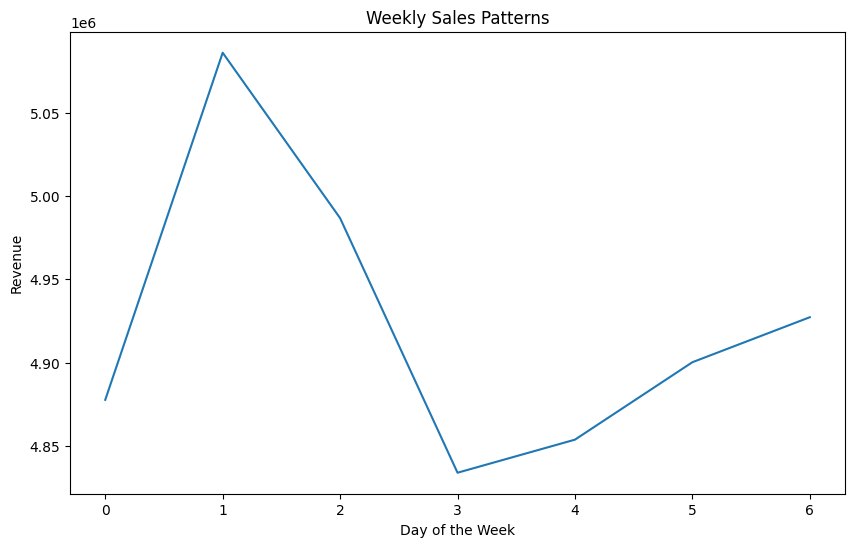

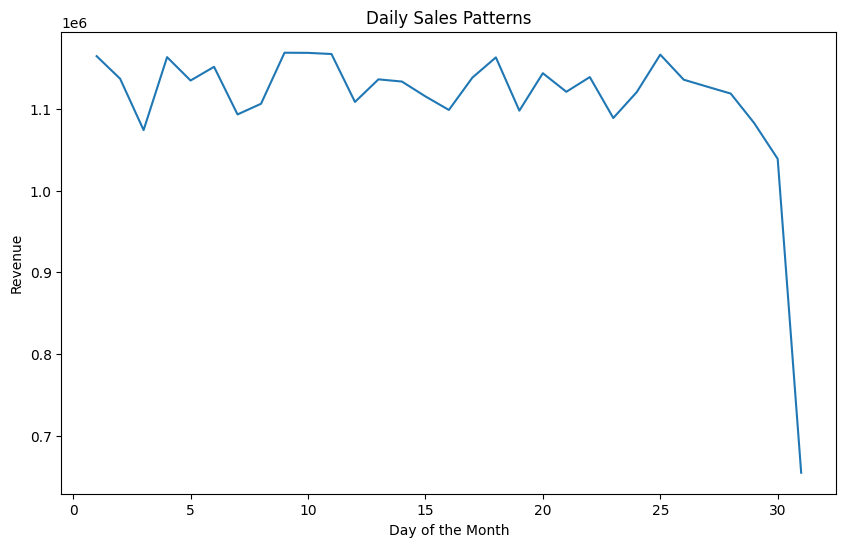

In [64]:
# Visualize weekly and daily sales patterns
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Weekly Sales Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Daily Sales Patterns')
plt.xlabel('Day of the Month')
plt.ylabel('Revenue')
plt.show()


In [65]:
# What are the busiest days of the week for sales?
busiest_days = weekday_sales.idxmax()
print(f"Busiest days of the week for sales: {busiest_days}")

Busiest days of the week for sales: 1
